<h1>Visualizing tweets and the Logistic Regression Model</h1>
<p>The objective of this notebook is to interpret the logistic regression model. <br><br><b>Steps:</b>
    <ul>
        <li>Plot tweets in a scatter plot using their positive and negative sums.</li>
        <li>Plot the output of the logistic regression model in the same plot as a solid line.</li>
     </ul>
    <br><b>Dataset : NLTK Twitter Dataset</b>
</p>


In [59]:
import nltk
from os import getcwd
import pandas as pd
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np
from utils import process_tweet, build_freqs

<h2>Load the Dataset</h2>

In [60]:
all_pos_tweets = twitter_samples.strings('positive_tweets.json')
all_neg_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_pos_tweets + all_neg_tweets
labels = np.append(np.ones((len(all_pos_tweets),1)), np.zeros((len(all_neg_tweets),1)), axis = 0)
print('tweets length : ',len(tweets))
print('labels shape : ',labels.shape)

#split data for training and testing
train_pos = all_pos_tweets[:4000]
train_neg = all_neg_tweets[:4000]

train_x = train_pos + train_neg 

print("Number of train_x tweets: ", len(train_x))

tweets length :  10000
labels shape :  (10000, 1)
Number of train_x tweets:  8000


<h2>Load the extacted features</h2>
<p>In this notebook, we will not create the features. Rather, we will use the previously calculated and stored features file.
    <br><br><b>But since we do not have the full features file, this time we will only use the 90 features data.</p>

In [61]:
data = pd.read_excel('Lab-3-logistic-features.xlsx');
data.head(5)

,bias,positive,negative,sentiment
0,1,3020,61,1
1,1,3573,444,1
2,1,3005,115,1
3,1,2862,4,1
4,1,3119,225,1


Get rid the dataframe and keep only the numpy arrays

In [62]:
# Each feature is labeled as bias, positive and negative
X = data[['bias', 'positive', 'negative']].values # Get only the numerical values of the dataframe
Y = data['sentiment'].values; # Put in Y the corresponding labels or sentiments

print(X.shape) # Print the shape of the X part
print(X[1:10])

(150, 3)
[[   1 3573  444]
 [   1 3005  115]
 [   1 2862    4]
 [   1 3119  225]
 [   1 2955  119]
 [   1 3934  538]
 [   1 3162  276]
 [   1  628  189]
 [   1  264  112]]


<h2>Load a pretrained Logistic Regression Model</h2>
<p>This time we also will not creaete the LR model, so we just use the resulting model. Notice that a list of 3 numeric values represent the whole model that we called <i>theta</i> $\theta$.</p>

In [63]:
theta = [7e-08, 0.0005239, -0.00055517]

## Plot the samples in a scatter plot

The vector theta represents a plane that split our feature space into two parts. Samples located over that plane are considered positive, and samples located under that plane are considered negative. Remember that we have a 3D feature space, i.e., each tweet is represented as a vector comprised of three values: `[bias, positive_sum, negative_sum]`, always having `bias = 1`. 

If we ignore the bias term, we can plot each tweet in a cartesian plane, using `positive_sum` and `negative_sum`. In the cell below, we do precisely this. Additionally, we color each tweet, depending on its class. Positive tweets will be green and negative tweets will be red.

Text(0, 0.5, 'Negative')

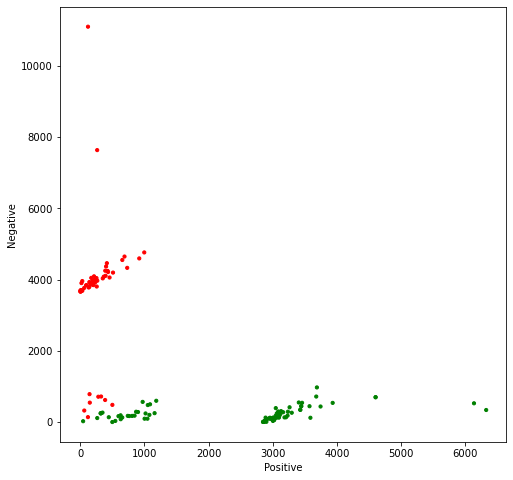

In [66]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 10)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

From the plot, it is evident that the features that we have chosen to represent tweets as numerical vectors allow an almost perfect separation between positive and negative tweets. So you can expect a very high accuracy for this model! 

## Plot the model alongside the data

We will draw a gray line to show the cutoff between the positive and negative regions. In other words, the gray line marks the line where $$ z = \theta * x = 0.$$
To draw this line, we have to solve the above equation in terms of one of the independent variables.

$$ z = \theta * x = 0$$
$$ x = [1, pos, neg] $$
$$ z(\theta, x) = \theta_0+ \theta_1 * pos + \theta_2 * neg = 0 $$
$$ neg = (-\theta_0 - \theta_1 * pos) / \theta_2 $$

The red and green lines that point in the direction of the corresponding sentiment are calculated using a perpendicular line to the separation line calculated in the previous equations(neg function). It must point in the same direction as the derivative of the Logit function, but the magnitude may differ. It is only for a visual representation of the model. 

$$direction = pos * \theta_2 / \theta_1$$

In [70]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

The green line in the chart points in the direction where z > 0 and the red line points in the direction where z < 0. The direction of these lines are given by the weights $\theta_1$ and $\theta_2$

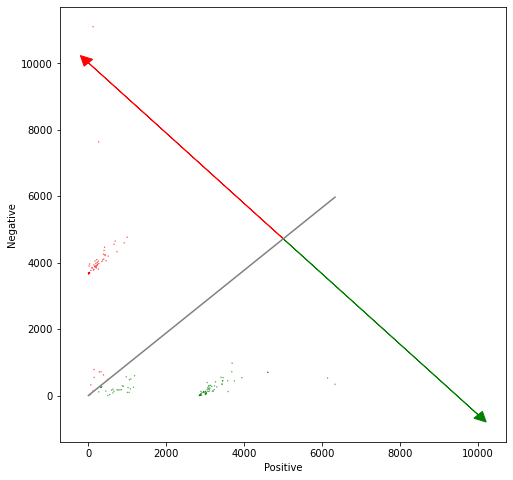

In [73]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=300, head_length=300, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=300, head_length=300, fc='r', ec='r')

plt.show()

**Note that more critical than the Logistic regression itself, are the features extracted from tweets that allow getting the right results in this exercise.**